In [113]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import sys


sys.path.append('../') #server per fare l'import di file in un'altra directory sullo stesso "livello"
from src.neuralNetwork.NeuralNetwork import Layer, NeuralNetwork
from src.neuralNetwork.function import IdentityFunction, ReLuFunction, SigmoidFunction, TanhFunction
from src.neuralNetwork.error import SquaredError, MeanAbsolutePercentageError
import keras.backend as K
import numpy as np

In [114]:
X = torch.rand(1000, 2)
y = X*2
learning_rate = 0.9
momentum_term = 0.5
regularization_term = 0

epoch = 100

In [115]:
from keras.layers import Dense
from keras.optimizers import SGD
from keras import Sequential, regularizers
import keras

# Definizione del modello sequenziale di Keras
model = Sequential()

# Aggiunta dei layer della rete neurale
model.add(Dense(10, input_dim=2, activation='relu', kernel_regularizer=regularizers.l2(regularization_term)))
model.add(Dense(2, activation='linear', kernel_regularizer=regularizers.l2(regularization_term)))

sgd = SGD(learning_rate=learning_rate, momentum=momentum_term, nesterov=False)

In [116]:
layer1 = Layer(num_neurons=10, num_inputs=2, activation_function=ReLuFunction())
layer2 = Layer(num_neurons=2, num_inputs=10, activation_function=IdentityFunction())

layer1.weights = np.matrix(model.layers[0].get_weights()[0].T).copy()
layer2.weights = np.matrix(model.layers[1].get_weights()[0].T).copy()

layer1.biases = np.matrix(model.layers[0].get_weights()[1].T).copy()
layer2.biases = np.matrix(model.layers[1].get_weights()[1].T).copy()

neuralNetwork = NeuralNetwork([layer1, layer2])

In [117]:
model.compile(loss='MSE', optimizer=sgd, metrics=['MSE'])

target_inputs =  np.matrix(X.numpy()).copy()
target_outputs = np.matrix(y.numpy()).copy()
history = model.fit(target_inputs, target_outputs, batch_size=len(target_inputs), epochs=epoch, shuffle=False)

Epoch 1/100
1/1 [==============================] - 1s 701ms/step - loss: 2.1266 - MSE: 2.1266
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7395 - MSE: 0.7395
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3682 - MSE: 0.3682
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2694 - MSE: 0.2694
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2641 - MSE: 0.2641
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2248 - MSE: 0.2248
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.2088 - MSE: 0.2088
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1980 - MSE: 0.1980
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.1854 - MSE: 0.1854
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.1796 - MSE: 0.1796
Epoch 11/100
1/1 [==============================] - 0s 0s/step - loss: 

In [118]:
target_inputs =  np.matrix(X.numpy()).copy()
target_outputs = np.matrix(y.numpy()).copy()
error_history, _ = neuralNetwork.train(target_inputs, target_outputs, learning_rate=learning_rate,
                                    regularization_term=regularization_term, momentum_term = momentum_term, epochs=epoch)

Epoch 0/100: Training error: 0.7395406840837077
Epoch 1/100: Training error: 0.4356961445879363
Epoch 2/100: Training error: 0.25183432408167605
Epoch 3/100: Training error: 0.23523080672003296
Epoch 4/100: Training error: 0.21920339561499924
Epoch 5/100: Training error: 0.20761069588914438
Epoch 6/100: Training error: 0.19786965073547316
Epoch 7/100: Training error: 0.19070516583155994
Epoch 8/100: Training error: 0.18503764882159537
Epoch 9/100: Training error: 0.18133843643948627
Epoch 10/100: Training error: 0.17843861249159562
Epoch 11/100: Training error: 0.17739092358002675
Epoch 12/100: Training error: 0.17763684711433209
Epoch 13/100: Training error: 0.1850737090337013
Epoch 14/100: Training error: 0.21605557574490936
Epoch 15/100: Training error: 0.311695220919531
Epoch 16/100: Training error: 0.6620330773575408
Epoch 17/100: Training error: 0.2500171056566108
Epoch 18/100: Training error: 0.2129604716597953
Epoch 19/100: Training error: 0.197937350012349
Epoch 20/100: Traini

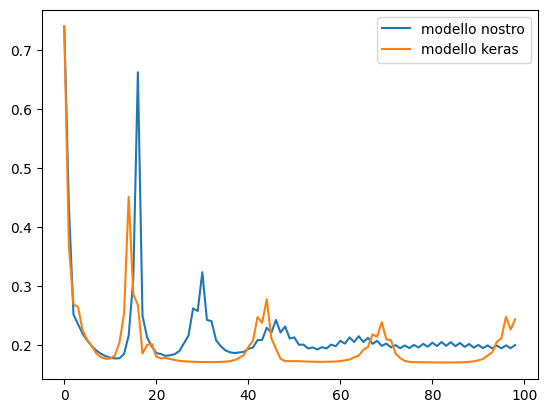

In [119]:
plt.plot(error_history[0:epoch-1], label='modello nostro')
plt.plot(history.history["MSE"][1:], label='modello keras')
plt.legend()

In [120]:
diff = np.array(error_history[0:epoch-1]) - np.array(history.history["MSE"][1:])
if np.all(np.abs(diff) < 0.001):
    print("Test passato")
else:
    print("Test fallito")

Test fallito
